# Data Augmentation Experiment

**Idea:** see how loss changes with respect to independent variables for ground truth, entropy, and EGCI

### Imports and Data Loading

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

from pyha_analyzer import extractors
from pyha_analyzer.preprocessors import MixItUp, ComposeAudioLabel
from pyha_analyzer.preprocessors.spectogram_preprocessors import WaveformPreprocessors # not in pyha-analyzer do we need to remake? @Sean1572
from audiomentations import AddBackgroundNoise, PolarityInversion, Gain

from egci_bioacoustic_shifts.utils import load_EGCI

import numpy as np
import torch
import random
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)


ImportError: cannot import name 'WaveformPreprocessors' from 'pyha_analyzer.preprocessors.spectogram_preprocessors' (/home/shperry/egci_bioacoustic_shifts/.venv/lib/python3.11/site-packages/pyha_analyzer/preprocessors/spectogram_preprocessors.py)

In [ ]:
from datasets import load_dataset
ds = load_dataset("DBD-research-group/BirdSet", "HSN", trust_remote_code=True, revision="b0c14a03571a7d73d56b12c4b1db81952c4f7e64")

ds["test"].features["ebird_code"].names

region = "HSN"
birdset_extactor = extractors.Birdset()
hsn_ads = birdset_extactor(region=region)

In [ ]:
experiment_parameters = [
    {
        "augmentation": ComposeAudioLabel([
            AddBackgroundNoise(
                sounds_path="/home/s.perry.543/pyha-analyzer-2.0/data_birdset/background_noise",
                min_snr_db=10,
                max_snr_db=30,
                noise_transform=PolarityInversion(),
                p=0.5
            ),
            Gain(
                min_gain_db = -12,
                max_gain_db = 12,
                p = 0.2
            ),
            MixItUp(
                dataset_ref=hsn_ads["train"],
                min_snr_db=10,
                max_snr_db=30,
                noise_transform=PolarityInversion(),
                p=0.7
            )

        ]),
        "run_name": "birdset_augmentations_Background-Gain-MixitUp",
        "region": region
    },
    {
        "augmentation": ComposeAudioLabel([
             AddBackgroundNoise(
                sounds_path="/home/s.perry.543/pyha-analyzer-2.0/data_birdset/background_noise",
                min_snr_db=10,
                max_snr_db=30,
                noise_transform=PolarityInversion(),
                p=0.8
            ),
            Gain(
                min_gain_db = -12,
                max_gain_db = 12,
                p = 0.8
            ),
            MixItUp(
                dataset_ref=hsn_ads["train"],
                min_snr_db=10,
                max_snr_db=30,
                noise_transform=PolarityInversion(),
                p=0.8
            )

        ]),
        "run_name": "birdset_augmentations_Background-Gain-MixitUp-0.8",
        "region": region
    },
    {
        "augmentation": ComposeAudioLabel([
             AddBackgroundNoise(
                sounds_path="/home/s.perry.543/pyha-analyzer-2.0/data_birdset/background_noise",
                min_snr_db=10,
                max_snr_db=30,
                noise_transform=PolarityInversion(),
                p=0.9
            ),
            Gain(
                min_gain_db = -12,
                max_gain_db = 12,
                p = 0.9
            ),
            MixItUp(
                dataset_ref=hsn_ads["train"],
                min_snr_db=10,
                max_snr_db=30,
                noise_transform=PolarityInversion(),
                p=0.9
            )

        ]),
        "run_name": "birdset_augmentations_Background-Gain-MixitUp-0.9",
        "region": region
    },
    {
        "augmentation": ComposeAudioLabel([
             AddBackgroundNoise(
                sounds_path="/home/s.perry.543/pyha-analyzer-2.0/data_birdset/background_noise",
                min_snr_db=0.1,
                max_snr_db=30,
                noise_transform=PolarityInversion(),
                p=0.9
            ),
            Gain(
                min_gain_db = -20,
                max_gain_db = 20,
                p = 0.9
            ),
            MixItUp(
                dataset_ref=hsn_ads["train"],
                min_snr_db=0.1,
                max_snr_db=30,
                noise_transform=PolarityInversion(),
                p=0.9
            )

        ]),
        "run_name": "birdset_augmentations_Background-Gain-MixitUp-0.9-extreme",
        "region": region
    },
    {
        "augmentation": ComposeAudioLabel([
             AddBackgroundNoise(
                sounds_path="/home/s.perry.543/pyha-analyzer-2.0/data_birdset/background_noise",
                min_snr_db=20,
                max_snr_db=40,
                noise_transform=PolarityInversion(),
                p=0.9
            ),
            Gain(
                min_gain_db = -5,
                max_gain_db = 5,
                p = 0.9
            ),
            MixItUp(
                dataset_ref=hsn_ads["train"],
                min_snr_db=20,
                max_snr_db=40,
                noise_transform=PolarityInversion(),
                p=0.9
            )

        ]),
        "run_name": "birdset_augmentations_Background-Gain-MixitUp-0.9-less-extreme",
        "region": region
    },
    {
        "augmentation": None,
        "run_name": "baseline-EfficentNet",
        "region": region
    },
    
]

AssertionError: 

/home/s.perry.543/EGCI_Experiments/.venv/lib/python3.11/site-packages/audiomentations/augmentations/add_background_noise.py:176: UserWarning: Warning: the LRU cache of AddBackgroundNoise gets discarded when pickling it. E.g. this means the cache will not be used when using AddBackgroundNoise together with multiprocessing on Windows
  warnings.warn(


2000it [02:07, 15.68it/s]
2000it [17:35,  1.90it/s]


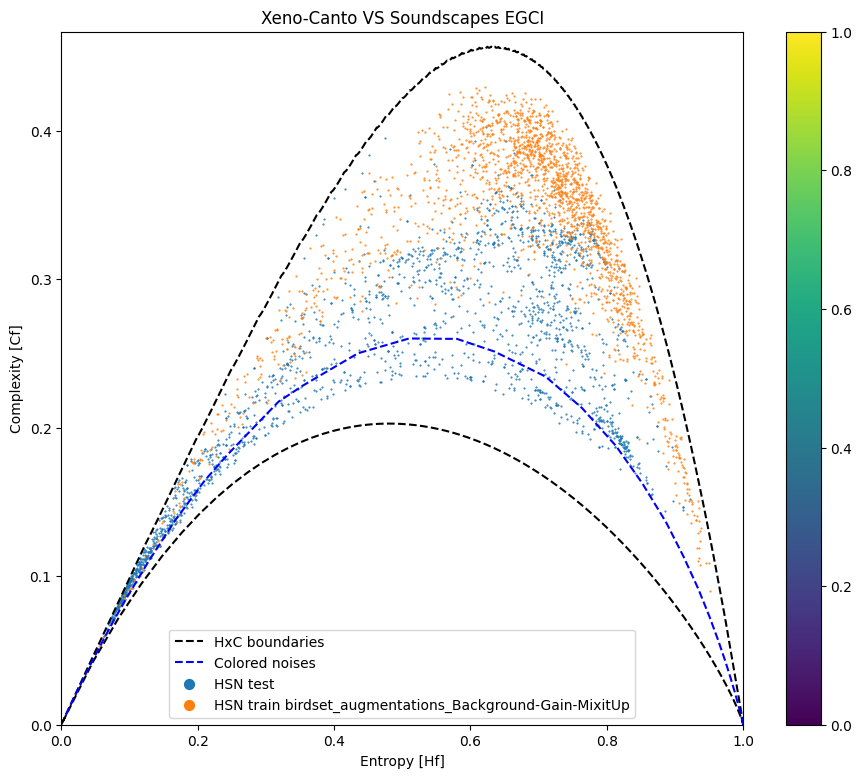

2000it [04:26,  7.52it/s]
2000it [22:22,  1.49it/s]


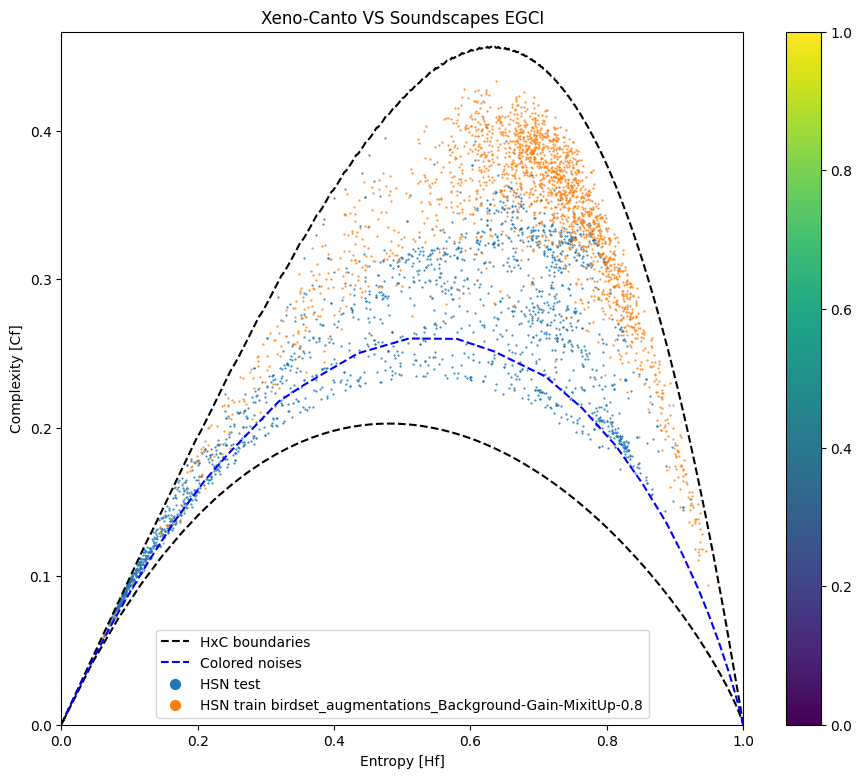

2000it [05:18,  6.28it/s]
2000it [22:27,  1.48it/s]


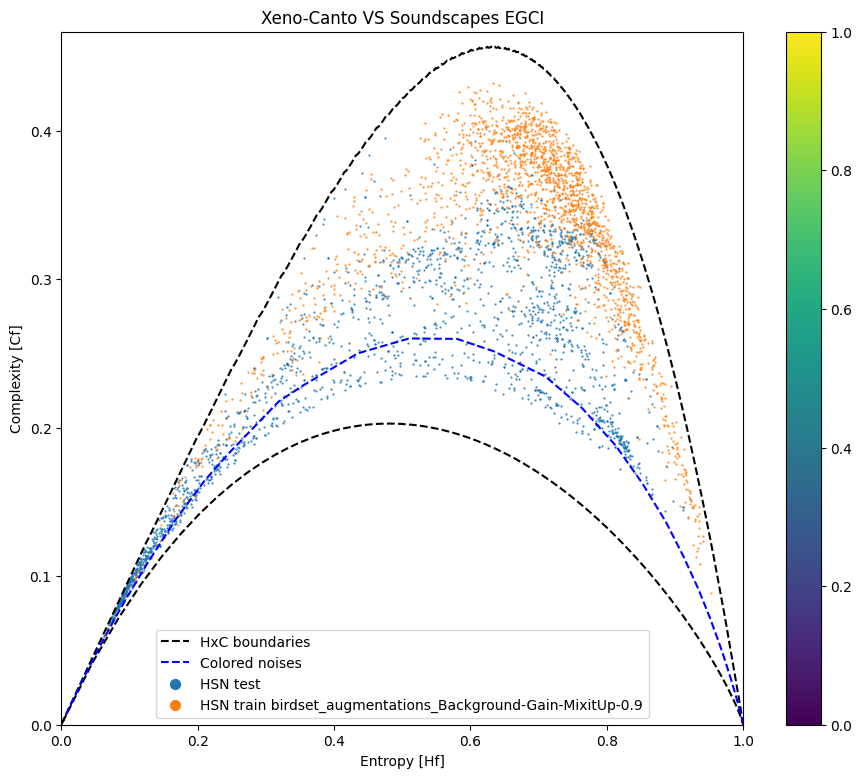

2000it [03:49,  8.70it/s]
2000it [19:40,  1.69it/s]


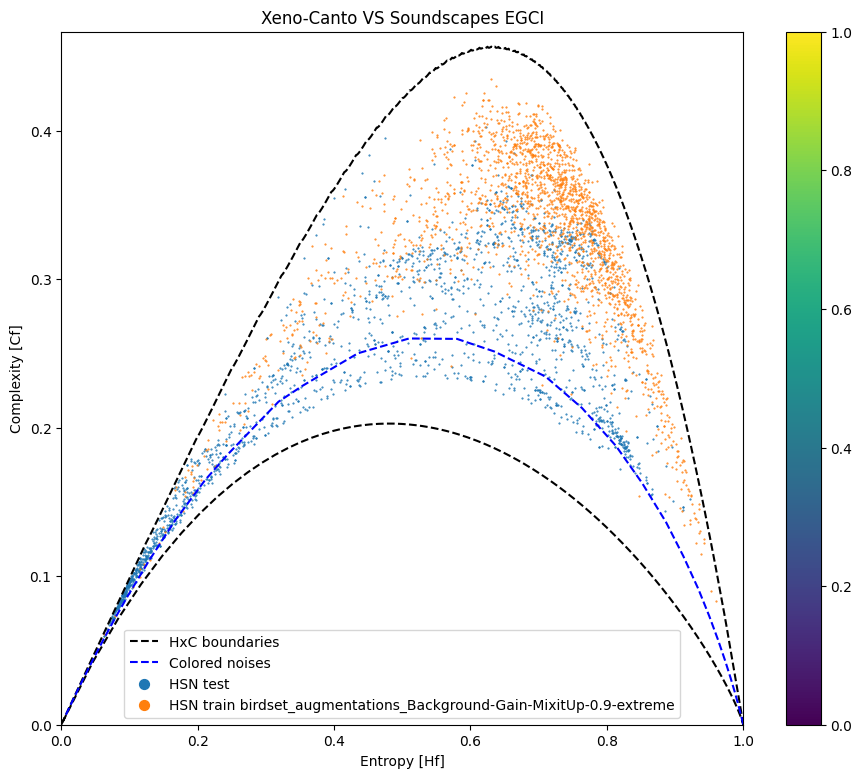

2000it [03:50,  8.69it/s]
2000it [20:00,  1.67it/s]


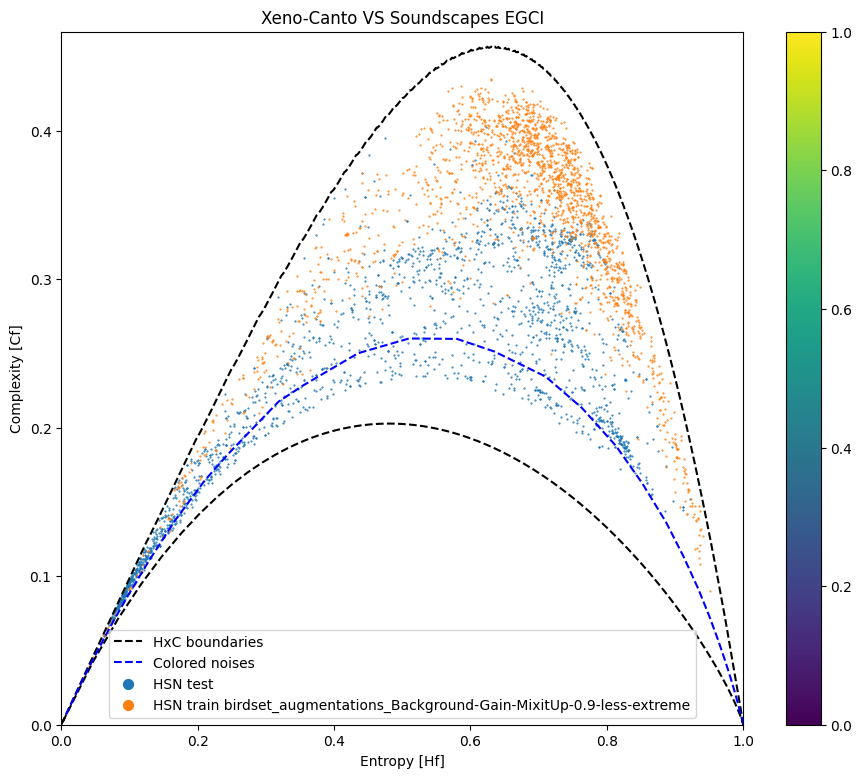

2000it [03:56,  8.47it/s]
2000it [14:50,  2.25it/s]


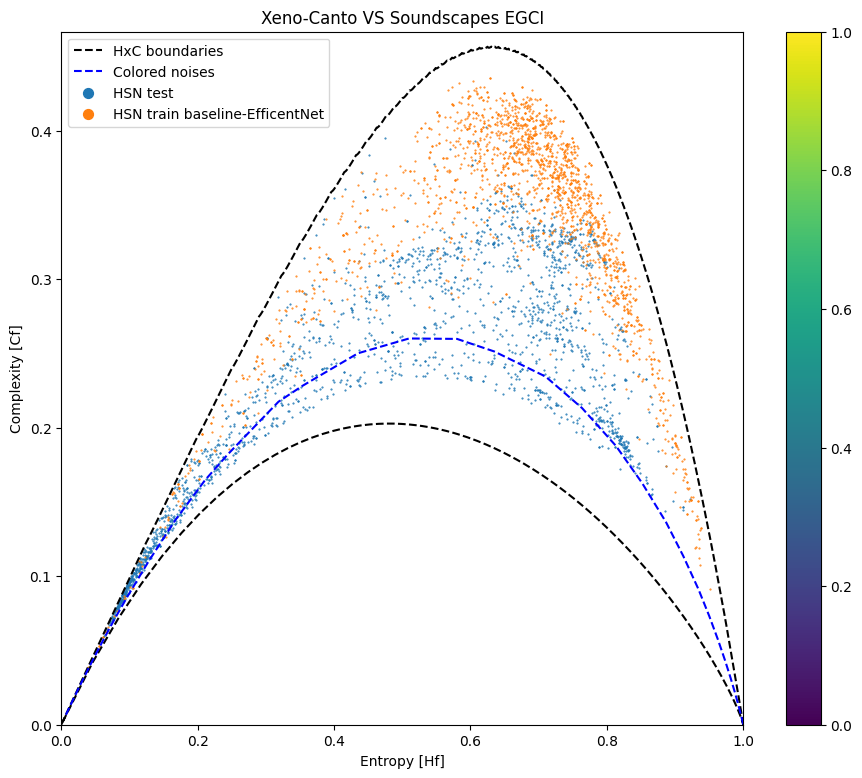

In [ ]:
train_idx = None
soundscapes_idx = None

distrbutions_datas = {}

for parameters in experiment_parameters:
    preprocessor = WaveformPreprocessors(
        duration=5, 
        augment=parameters["augmentation"],
    )

    test_preprocessor = WaveformPreprocessors(
        duration=5, 
        augment=None,
    )

    hsn_ads["train"].set_transform(preprocessor)
    hsn_ads["valid"].set_transform(test_preprocessor)
    hsn_ads["test"].set_transform(test_preprocessor)
    
    fig, out1, soundscapes_data, soundscapes_idx = load_EGCI(region = "HSN", dataset_sub="test", fig=None, ds=hsn_ads, indx = soundscapes_idx)
    fig, out1, xeno_canto_data, train_idx = load_EGCI(region = "HSN", dataset_sub="train", label=parameters["run_name"], fig=fig, ds=hsn_ads, indx=train_idx)
    plt.savefig(f'{parameters["run_name"]}.png')
    plt.title("Xeno-Canto VS Soundscapes EGCI")
    plt.show()

    distrbutions_datas[parameters["run_name"]] = {
        "xeno-canto": xeno_canto_data,
        "soundscape": soundscapes_data
    }




# Rerun the divergence metric study of experiment

In [3]:
from egci_bioacoustic_shifts.utils import measure_distrbution_metrics
import pandas as pd


def test_kl_divergence(focal, soundcape, num_samples = 2000, num_trials = 1000):
    focal_data = focal
    soundscape_data = soundcape

    focal_data = np.array(focal_data[:2])
    soundscape_data = np.array(soundscape_data[:2])

    total_items = min(focal_data.shape[-1], soundscape_data.shape[-1])

    focal_data = focal_data[:total_items]
    soundscape_data = soundscape_data[:total_items]

    test_df = pd.DataFrame(
        {
            "h": np.concat((focal_data[0], soundscape_data[0])),
            "c": np.concat((focal_data[1], soundscape_data[1])),
            "label": ["focal"] * focal_data.shape[-1] + ["soundscape"] * soundscape_data.shape[-1]
        }
    )
    
    KL_d_XC_S_name = "Kullback-Leibler divergence Xeno-canto to Soundscapes"
    KL_d_S_XC_name = "Kullback-Leibler divergence Soundscapes to Xeno-canto"


    sample_stats1 = measure_distrbution_metrics(
        test_df[test_df["label"] == "focal"][["h", "c"]],
        test_df[test_df["label"] == "soundscape"][["h", "c"]],
        emd=False
    )

    print(sample_stats1)

    KL_d_XC_s_stat = sample_stats1[KL_d_XC_S_name]
    KL_d_S_XC_stat = sample_stats1[KL_d_S_XC_name]

    KL_d_XC_S = []
    KL_d_S_XC = []

    for i in range(num_trials):
        test_df["label_shuffled"] = test_df["label"].sample(frac=1, replace=True).reset_index(drop=True)
        test_stats1 = measure_distrbution_metrics(
            test_df[test_df["label_shuffled"] == "focal"][["h", "c"]],
            test_df[test_df["label_shuffled"] == "soundscape"][["h", "c"]],
            emd=False
        )
        KL_d_XC_S.append(test_stats1[KL_d_XC_S_name])
        KL_d_S_XC.append(test_stats1[KL_d_S_XC_name])

    return(
        KL_d_XC_s_stat,
        (np.array(KL_d_XC_S) > KL_d_XC_s_stat).mean(),

        KL_d_S_XC_stat,
        (np.array(KL_d_S_XC) > KL_d_S_XC_stat).mean(),
    )
    

1000it [01:54,  8.74it/s]


NameError: name 'parameters' is not defined

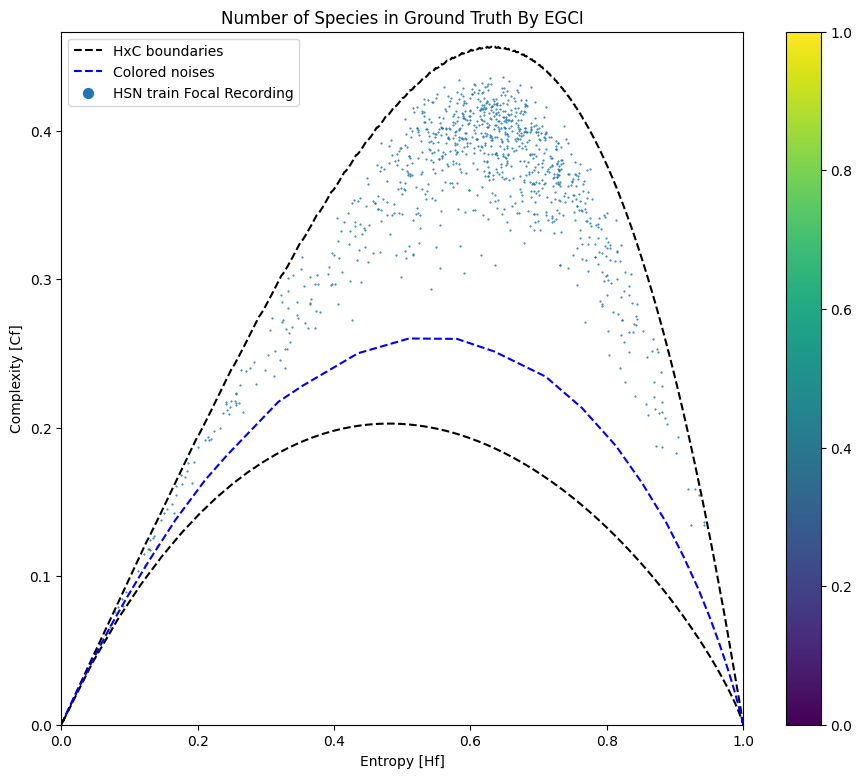

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import statsmodels.api as sm
import pandas as pd
import numpy as np

from pyha_analyzer import PyhaTrainer, PyhaTrainingArguments, extractors
from pyha_analyzer.models.demo_CNN import ResnetConfig, ResnetModel
from pyha_analyzer.preprocessors import MelSpectrogramPreprocessors, MixItUp, ComposeAudioLabel
from audiomentations import Compose, AddColorNoise, AddBackgroundNoise, PolarityInversion, Gain
from pyha_analyzer.models import EfficentNet

import numpy as np
import torch
import random
import json
import matplotlib.pyplot as plt

torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

import warnings
warnings.filterwarnings("ignore") #AUDIOMENTIONS REALLY NEEDS TO QUIET RESAMPLING WARNINGS

from egci_bioacoustic_shifts import load_EGCI, process_data, measure_distrbution_metrics

train_idx = None
soundscapes_idx = None

# Experiment Parameters
regions = ["HSN", "PER", "UHH", "SNE", "POW", "NES"]
num_samples = 1000
num_trials = 100
birdset_extactor = extractors.Birdset()

with open("e3_results.json", "r") as file:
    experiment_results = json.load(file)

region = "HSN"
ads = birdset_extactor(region=region)
experiment_parameters = [
    {
        "augmentation": ComposeAudioLabel([
            AddBackgroundNoise(
                sounds_path="data_birdset/background_noise",
                min_snr_db=10,
                max_snr_db=30,
                noise_transform=PolarityInversion(),
                p=1
            ),
            Gain(
                min_gain_db = 10,
                max_gain_db = 30,
                p = 1
            ),
            MixItUp(
                dataset_ref=ads["train"],
                min_snr_db=10,
                max_snr_db=30,
                noise_transform=PolarityInversion(),
                p=1
            )

        ]),
        "run_name": "aug1",
        "region": region
    },
    {
        "augmentation": ComposeAudioLabel([
            AddBackgroundNoise(
                sounds_path="data_birdset/background_noise",
                min_snr_db=-10,
                max_snr_db=10,
                noise_transform=PolarityInversion(),
                p=1
            ),
            Gain(
                min_gain_db = -10,
                max_gain_db = 10,
                p = 1
            ),
            MixItUp(
                dataset_ref=ads["train"],
                min_snr_db=-10,
                max_snr_db=10,
                noise_transform=PolarityInversion(),
                p=1
            )

        ]),
        "run_name": "aug2",
        "region": region
    },
     {
        "augmentation": ComposeAudioLabel([
            AddBackgroundNoise(
                sounds_path="data_birdset/background_noise",
                min_snr_db=-30,
                max_snr_db=30,
                noise_transform=PolarityInversion(),
                p=1
            ),
            Gain(
                min_gain_db = -30,
                max_gain_db = 30,
                p = 1
            ),
            MixItUp(
                dataset_ref=ads["train"],
                min_snr_db=-30,
                max_snr_db=30,
                noise_transform=PolarityInversion(),
                p=1
            )

        ]),
        "run_name": "aug3",
        "region": region
    },
    {
        "augmentation": ComposeAudioLabel([
            AddBackgroundNoise(
                sounds_path="data_birdset/background_noise",
                min_snr_db=-30,
                max_snr_db=-10,
                noise_transform=PolarityInversion(),
                p=1
            ),
            Gain(
                min_gain_db = -30,
                max_gain_db = -10,
                p = 1
            ),
            MixItUp(
                dataset_ref=ads["train"],
                min_snr_db=-30,
                max_snr_db=-10,
                noise_transform=PolarityInversion(),
                p=1
            )

        ]),
        "run_name": "aug4",
        "region": region
    },
]
experiment_results[region] = {}

# # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
# colors = ["#D81B60", "#1E88E5", "#FFC107", "#004D40", "#E49626", "#E5DAA9"]
class AugmentAudio():
    def __init__(self, augmentations):
        self.augmentations = augmentations
    
    def __call__(self, data):
        return process_data(data, audio_processing=self.augmentations)



fig, _, no_aug_data, idx = load_EGCI(region = region, dataset_sub="train", label="Focal Recording", fig=None, ds=ads, sample=num_samples)

# fig, _, aug_data, idx = load_EGCI(region = region, dataset_sub="train", label="Augmented Focal Recording", fig=fig, ds=ads_no_aug, sample=idx, process_data_func=process_aug)
  
for parameters in experiment_parameters:
    process_aug = AugmentAudio(parameters["augmentation"])
    fig, _, aug_data, _ = load_EGCI(region = region, dataset_sub="train", label="Augmented Focal Recording2", fig=fig, ds=ads, sample=idx, process_data_func=process_aug2)
    # plt.savefig(f'{parameters["run_name"]}.png')
    plt.title("Xeno-Canto VS Soundscapes EGCI")
    plt.show()
    print(parameters["run_name"], test_kl_divergence(no_aug_data, aug_data))
